PyTorch has a module `nn` that provides a nice way to efficiently build large neural networks. We will be using the MNIST handwritten digit dataset, which comes in the form of `28 * 28` pixel values

In [1]:
from torchvision import datasets, transforms
import torch
from matplotlib import pyplot as plt

In [2]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 27157044.36it/s]                            


Extracting /tmp/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 278960.78it/s]                           
0it [00:00, ?it/s]

Extracting /tmp/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 5865805.26it/s]                          
8192it [00:00, 101004.28it/s]


Extracting /tmp/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting /tmp/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


Data loader turns our data into an iterator and then we can use `iter(trainloader)` to call the next batch of data. We can also use a loop for the same as 

for image, label in trainloader:

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])


In [4]:
# 64 - no of images
# 1 - no of channels (gray scale only)
# 28 * 28 pixels = shape of the images

In [5]:
print(labels.shape)

torch.Size([64])


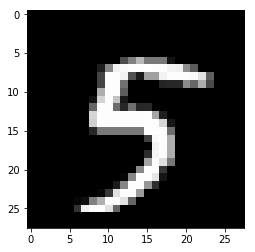

In [6]:
plt.imshow(images[1].reshape((28,28)), cmap="gray")

In [7]:
n_inputs = 784
n_hidden = 256
n_output = 10

In [8]:
W1 = torch.randn(n_inputs, n_hidden)
W1.shape

torch.Size([784, 256])

In [9]:
W2 = torch.randn(n_hidden, n_output)
W2.shape

torch.Size([256, 10])

In [10]:
B1 = torch.randn(n_hidden)
B1.shape

torch.Size([256])

In [11]:
B2 = torch.randn(n_output)
B2.shape

torch.Size([10])

In [12]:
def activation(x):
    return 1/(1+torch.exp(-x))

In [13]:
images.shape

torch.Size([64, 1, 28, 28])

In [14]:
images[0].shape

torch.Size([1, 28, 28])

In [15]:
# flatten the images
images = images.view(images.shape[0], -1)
images.shape

torch.Size([64, 784])

In [16]:
h = activation(torch.mm(images, W1) + B1)

In [17]:
outputs = torch.mm(h, W2) + B2
outputs.shape

torch.Size([64, 10])

In [18]:
# dim = 1 is for the sum of every row
# TODO: understand the view function well
def softmax(x):
    x = torch.exp(x)
    exp_sums = torch.sum(x, dim = 1).view(-1,1)
    return  x / exp_sums
    

In [19]:
outputs = softmax(outputs)

In [20]:
outputs

tensor([[5.3496e-11, 8.1244e-11, 1.1178e-08, 5.9048e-03, 9.5720e-01, 4.6119e-07,
         2.4283e-08, 1.9378e-09, 2.8456e-02, 8.4357e-03],
        [5.4131e-14, 2.6512e-12, 7.9556e-07, 6.9272e-07, 8.9618e-01, 3.3804e-07,
         9.0165e-15, 1.6332e-10, 9.4013e-09, 1.0382e-01],
        [8.3075e-15, 1.7572e-14, 1.2813e-10, 9.8018e-01, 1.8160e-11, 4.9070e-09,
         3.2599e-13, 2.2629e-13, 1.5865e-09, 1.9821e-02],
        [2.8522e-12, 1.3559e-10, 1.9819e-01, 1.6367e-02, 5.5684e-06, 8.2852e-04,
         5.5358e-09, 5.9063e-07, 6.0172e-01, 1.8289e-01],
        [1.1794e-11, 1.6927e-14, 9.6698e-12, 5.8408e-01, 3.0206e-02, 2.5765e-08,
         1.7489e-06, 2.1465e-07, 3.0207e-04, 3.8541e-01],
        [4.5371e-11, 7.8617e-12, 1.4348e-07, 2.0355e-07, 1.1946e-02, 6.1722e-03,
         5.2901e-12, 4.9063e-05, 7.5266e-02, 9.0657e-01],
        [6.8089e-12, 1.2483e-14, 3.8417e-09, 3.6213e-07, 1.5297e-05, 1.6258e-08,
         4.9884e-14, 4.7975e-11, 5.2238e-06, 9.9998e-01],
        [1.9403e-13, 8.7119

In [21]:
print(outputs.sum(dim = 1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [22]:
from torch import nn

In [23]:
class MyNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim = 1)
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        return x

In [24]:
model = MyNetwork()
model

MyNetwork(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [25]:
import torch.nn.functional as F

In [26]:
class AnotherNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim = 1)
        return x

In [27]:
# we can do this is because we can keep softmax and sigmoid purely functional without
# creating any objects or classes or instances for them
# both the implementations are the same

In [28]:
class NewNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        self.hidden_1 = nn.Linear(784, 128)
        self.hidden_2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.hidden_1(x))
        x = F.relu(self.hidden_2(x))
        x = F.softmax(self.output(x), dim = 1)
        
        return x

In [29]:
model = NewNetwork()
model

NewNetwork(
  (hidden_1): Linear(in_features=784, out_features=128, bias=True)
  (hidden_2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)